In [1]:
import requests

def get_soil_nutrients(lat, lon, property_name="nitrogen"):
    """
    Retrieve soil nutrient data for a given location.

    This example uses the SoilGrids API to query a specific soil property,
    such as 'nitrogen', 'phosphorus', or 'potassium'.
    """
    base_url = "https://rest.isric.org/soilgrids/v2.0/properties/query"
    params = {
        "lat": lat,
        "lon": lon,
        # You can change the property to one of interest, e.g. "nitrogen", "phosphorus", etc.
        "property": property_name
    }

    response = requests.get(base_url, params=params)
    if response.status_code == 200:
        data = response.json()
        return data
    else:
        print(f"Error retrieving nutrient data (status code: {response.status_code})")
        return None

def get_invasive_species(scientific_name, limit=10):
    """
    Retrieve occurrence records for an invasive species using the GBIF API.

    For example, you might search for an invasive species like 'Phragmites australis'.
    """
    base_url = "https://api.gbif.org/v1/occurrence/search"
    params = {
        "scientificName": scientific_name,
        "limit": limit
    }

    response = requests.get(base_url, params=params)
    if response.status_code == 200:
        data = response.json()
        return data
    else:
        print(f"Error retrieving invasive species data (status code: {response.status_code})")
        return None

# Example usage
if __name__ == "__main__":
    # Example coordinates (latitude and longitude)
    lat = 40.7128    # e.g., New York City latitude
    lon = -74.0060   # e.g., New York City longitude

    # Retrieve nutrient data (for instance, nitrogen)
    nutrient_data = get_soil_nutrients(lat, lon, property_name="nitrogen")
    if nutrient_data:
        print("Nutrient Data (Nitrogen):")
        print(nutrient_data)

    # Retrieve invasive species data; change the scientific name as needed.
    invasive_species = "Phragmites australis"  # Example invasive species
    invasive_data = get_invasive_species(invasive_species, limit=5)
    if invasive_data:
        print("\nInvasive Species Occurrence Data:")
        print(invasive_data)


Nutrient Data (Nitrogen):
{'type': 'Feature', 'geometry': {'type': 'Point', 'coordinates': [-74.006, 40.7128]}, 'properties': {'layers': [{'name': 'nitrogen', 'unit_measure': {'d_factor': 100, 'mapped_units': 'cg/kg', 'target_units': 'g/kg', 'uncertainty_unit': ''}, 'depths': [{'range': {'top_depth': 0, 'bottom_depth': 5, 'unit_depth': 'cm'}, 'label': '0-5cm', 'values': {'Q0.05': None, 'Q0.5': None, 'Q0.95': None, 'mean': None, 'uncertainty': None}}, {'range': {'top_depth': 5, 'bottom_depth': 15, 'unit_depth': 'cm'}, 'label': '5-15cm', 'values': {'Q0.05': None, 'Q0.5': None, 'Q0.95': None, 'mean': None, 'uncertainty': None}}, {'range': {'top_depth': 15, 'bottom_depth': 30, 'unit_depth': 'cm'}, 'label': '15-30cm', 'values': {'Q0.5': None, 'Q0.05': None, 'Q0.95': None, 'mean': None, 'uncertainty': None}}, {'range': {'top_depth': 30, 'bottom_depth': 60, 'unit_depth': 'cm'}, 'label': '30-60cm', 'values': {'Q0.05': None, 'Q0.5': None, 'Q0.95': None, 'mean': None, 'uncertainty': None}}, {'ra

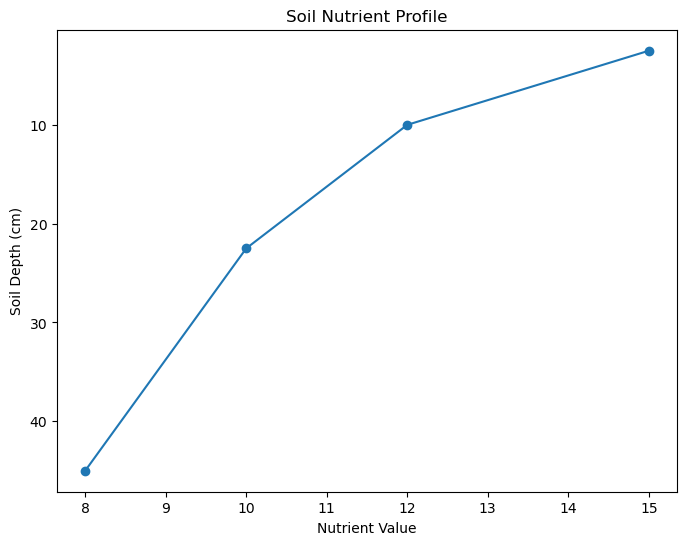

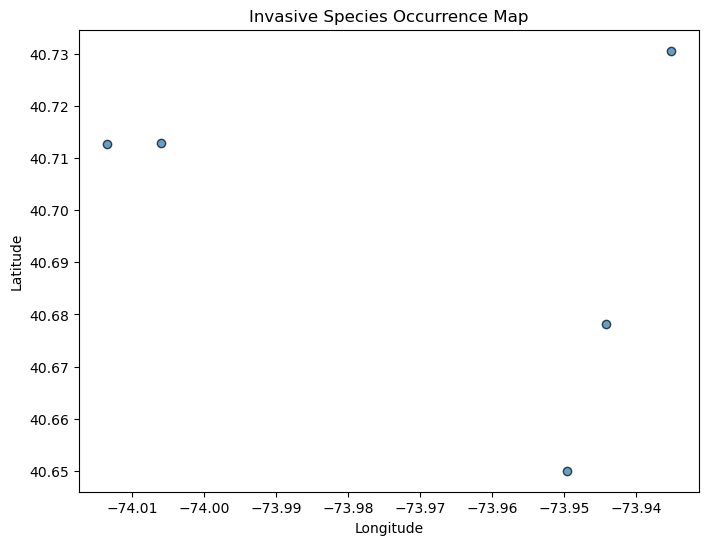

In [2]:
import matplotlib.pyplot as plt

def plot_nutrient_data(nutrient_data):
    """
    Visualize soil nutrient data from SoilGrids.

    This example assumes that the nutrient_data dictionary contains a
    'properties' key with a nested structure for different soil layers,
    each with a 'depth' range and a 'value' for the nutrient.

    Adjust the parsing logic to match the actual structure of your API response.
    """
    # Example: assuming nutrient_data['properties']['layers'] is a list of dicts
    layers = nutrient_data.get('properties', {}).get('layers', [])

    depths = []
    nutrient_values = []

    # Extracting a representative value for each layer
    for layer in layers:
        # For demonstration, assume each layer contains a 'depth' and a 'value'
        # Modify these keys based on the actual API structure.
        depth = layer.get('depth')  # e.g., "0-5cm"
        value = layer.get('value')
        if depth and value is not None:
            # Here, we convert a depth range string to a midpoint for plotting.
            try:
                low, high = [float(x.replace('cm', '').strip()) for x in depth.split('-')]
                midpoint = (low + high) / 2
                depths.append(midpoint)
                nutrient_values.append(value)
            except Exception as e:
                print(f"Error processing layer depth {depth}: {e}")

    if depths and nutrient_values:
        plt.figure(figsize=(8, 6))
        plt.plot(nutrient_values, depths, marker='o')
        plt.gca().invert_yaxis()  # Deeper layers at the bottom
        plt.xlabel('Nutrient Value')
        plt.ylabel('Soil Depth (cm)')
        plt.title('Soil Nutrient Profile')
        plt.show()
    else:
        print("No valid nutrient data to plot.")

def plot_invasive_species(invasive_data):
    """
    Visualize occurrence data for an invasive species from the GBIF API.

    This function extracts latitude and longitude information from the data and plots
    them as a scatter plot.
    """
    occurrences = invasive_data.get('results', [])
    latitudes = []
    longitudes = []

    for record in occurrences:
        lat = record.get('decimalLatitude')
        lon = record.get('decimalLongitude')
        if lat is not None and lon is not None:
            latitudes.append(lat)
            longitudes.append(lon)

    if latitudes and longitudes:
        plt.figure(figsize=(8, 6))
        plt.scatter(longitudes, latitudes, alpha=0.7, edgecolor='k')
        plt.xlabel('Longitude')
        plt.ylabel('Latitude')
        plt.title('Invasive Species Occurrence Map')
        plt.show()
    else:
        print("No valid occurrence data to plot.")

# Example usage
if __name__ == "__main__":
    # Assume you have already retrieved your data:
    # nutrient_data = get_soil_nutrients(lat, lon, property_name="nitrogen")
    # invasive_data = get_invasive_species("Phragmites australis", limit=10)

    # For demonstration, let's assume nutrient_data and invasive_data are available.
    # Replace the following dummy dictionaries with your actual API responses.

    # Dummy nutrient data structure (modify according to actual API response)
    nutrient_data = {
        "properties": {
            "layers": [
                {"depth": "0-5cm", "value": 15},
                {"depth": "5-15cm", "value": 12},
                {"depth": "15-30cm", "value": 10},
                {"depth": "30-60cm", "value": 8}
            ]
        }
    }

    # Dummy invasive species occurrence data (modify according to actual API response)
    invasive_data = {
        "results": [
            {"decimalLatitude": 40.7128, "decimalLongitude": -74.0060},
            {"decimalLatitude": 40.7306, "decimalLongitude": -73.9352},
            {"decimalLatitude": 40.6500, "decimalLongitude": -73.9496},
            {"decimalLatitude": 40.6782, "decimalLongitude": -73.9442},
            {"decimalLatitude": 40.7127, "decimalLongitude": -74.0134}
        ]
    }

    # Visualize the nutrient profile
    plot_nutrient_data(nutrient_data)

    # Visualize the invasive species occurrence data
    plot_invasive_species(invasive_data)


In [3]:
import requests
import json

def get_daily_precipitation_data(start_date, end_date,
                                 lat_min, lat_max, lon_min, lon_max):
    """
    Retrieve daily precipitation data (PRECTOT) from NASA POWER
    for a specified bounding box and date range.

    :param start_date: Start date in YYYYMMDD format (e.g., "20230101")
    :param end_date:   End date in YYYYMMDD format   (e.g., "20231231")
    :param lat_min:    Minimum latitude  (e.g., 14 for southern Mauritania)
    :param lat_max:    Maximum latitude  (e.g., 18)
    :param lon_min:    Minimum longitude (e.g., -12)
    :param lon_max:    Maximum longitude (e.g., -6)
    :return:           Dictionary of precipitation data if successful, None otherwise.
    """

    # NASA POWER daily data (regional endpoint)
    base_url = "https://power.larc.nasa.gov/api/temporal/daily/regional"

    # Define query parameters
    params = {
        "start": start_date,
        "end": end_date,
        "latitude-min": lat_min,
        "latitude-max": lat_max,
        "longitude-min": lon_min,
        "longitude-max": lon_max,
        "community": "AG",            # AG = Agriculture community
        "parameters": "PRECTOT",      # Daily total precipitation
        "format": "JSON",             # Response format
        "header": "true",             # Include metadata in the response
        "time-standard": "UTC"
    }

    # Send GET request
    response = requests.get(base_url, params=params)

    if response.status_code == 200:
        data = response.json()
        return data
    else:
        print(f"Error: Received status code {response.status_code}")
        return None

def main():
    """
    Example usage: Retrieve daily precipitation for part of
    the Sahel region in Mauritania for 2023.
    """
    # Approximate bounding box for southern Mauritania (adjust as needed)
    lat_min, lat_max = 14, 18
    lon_min, lon_max = -12, -6

    # Date range: all of 2023 (adjust as needed)
    start_date = "20230101"  # YYYYMMDD
    end_date = "20231231"

    # Fetch the data
    precip_data = get_daily_precipitation_data(start_date, end_date,
                                               lat_min, lat_max,
                                               lon_min, lon_max)

    # Print or process the data
    if precip_data:
        print("Successfully retrieved precipitation data!")
        # Print the JSON with indentation for clarity
        print(json.dumps(precip_data, indent=2))
    else:
        print("No data returned.")

if __name__ == "__main__":
    main()


Successfully retrieved precipitation data!
{
  "features": [
    {
      "type": "Feature",
      "geometry": {
        "type": "Point",
        "coordinates": [
          -11.875,
          14.0,
          114.91
        ]
      },
      "properties": {
        "parameter": {
          "PRECTOTCORR": {
            "20230101": 0.0,
            "20230102": 0.0,
            "20230103": 0.0,
            "20230104": 0.0,
            "20230105": 0.0,
            "20230106": 0.0,
            "20230107": 0.0,
            "20230108": 0.0,
            "20230109": 0.0,
            "20230110": 0.0,
            "20230111": 0.0,
            "20230112": 0.0,
            "20230113": 0.0,
            "20230114": 0.0,
            "20230115": 0.0,
            "20230116": 0.0,
            "20230117": 0.0,
            "20230118": 0.0,
            "20230119": 0.0,
            "20230120": 0.0,
            "20230121": 0.0,
            "20230122": 0.0,
            "20230123": 0.0,
            "20230124": 0.0,

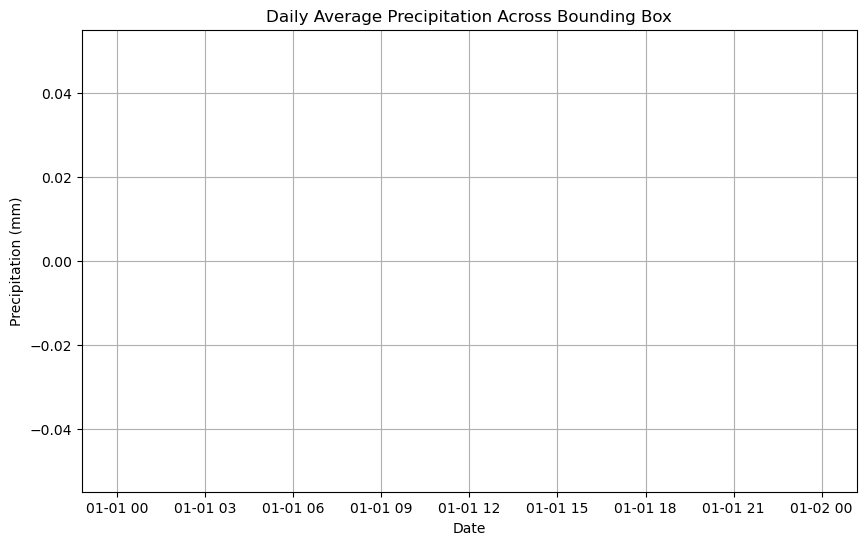

In [5]:
import requests
import json

def get_daily_precipitation_data(start_date, end_date,
                                 lat_min, lat_max, lon_min, lon_max):
    base_url = "https://power.larc.nasa.gov/api/temporal/daily/regional"

    params = {
        "start": start_date,
        "end": end_date,
        "latitude-min": lat_min,
        "latitude-max": lat_max,
        "longitude-min": lon_min,
        "longitude-max": lon_max,
        "community": "AG",
        "parameters": "PRECTOT",
        "format": "JSON",
        "header": "true",
        "time-standard": "UTC"
    }

    response = requests.get(base_url, params=params)

    if response.status_code == 200:
        return response.json()
    else:
        print(f"Error: Received status code {response.status_code}")
        return None


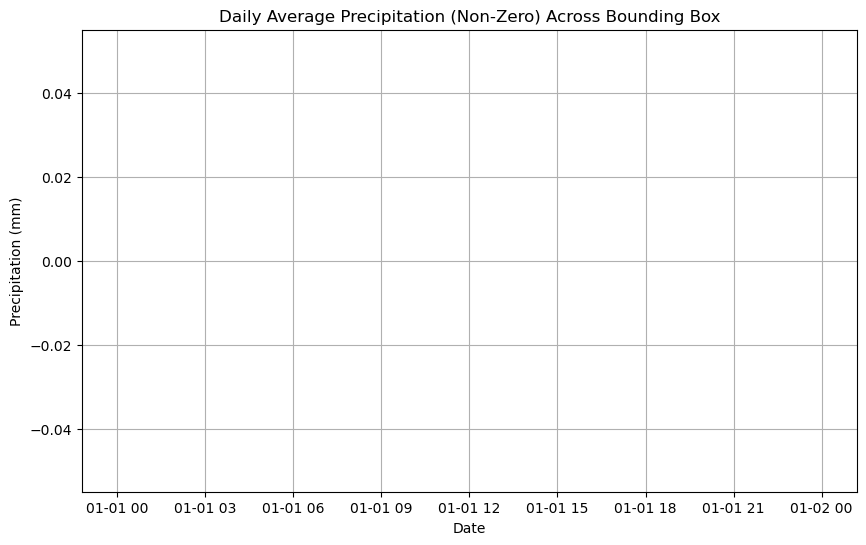

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import requests
import json

def get_daily_precipitation_data(start_date, end_date,
                                 lat_min, lat_max, lon_min, lon_max):
    base_url = "https://power.larc.nasa.gov/api/temporal/daily/regional"

    params = {
        "start": start_date,
        "end": end_date,
        "latitude-min": lat_min,
        "latitude-max": lat_max,
        "longitude-min": lon_min,
        "longitude-max": lon_max,
        "community": "AG",
        "parameters": "PRECTOT",
        "format": "JSON",
        "header": "true",
        "time-standard": "UTC"
    }

    response = requests.get(base_url, params=params)

    if response.status_code == 200:
        return response.json()
    else:
        print(f"Error: Received status code {response.status_code}")
        return None

def visualize_daily_precipitation(precip_data):
    """
    Create a time series of average daily precipitation across the bounding box,
    excluding days with 0 mm rainfall.
    """
    if not precip_data:
        print("No precipitation data to visualize.")
        return

    features = precip_data.get("features")
    if not features:
        print("No 'features' found in the precipitation data.")
        return

    daily_sums = {}
    daily_counts = {}

    # Loop through each grid cell (feature) and accumulate daily values.
    for feature in features:
        props = feature.get("properties", {})
        param_data = props.get("parameter", {})
        prectot_data = param_data.get("PRECTOT", {})

        for date_str, precip_value in prectot_data.items():
            if date_str not in daily_sums:
                daily_sums[date_str] = 0.0
                daily_counts[date_str] = 0
            daily_sums[date_str] += precip_value
            daily_counts[date_str] += 1

    # Compute daily average precipitation
    daily_averages = {}
    for date_str in daily_sums:
        daily_averages[date_str] = daily_sums[date_str] / daily_counts[date_str]

    # Convert dictionary to a DataFrame and filter out days with 0 mm rainfall.
    df = pd.DataFrame({
        "date": list(daily_averages.keys()),
        "precip_mm": list(daily_averages.values())
    })

    # Convert the date strings to datetime objects and sort the DataFrame.
    df["date"] = pd.to_datetime(df["date"])
    df = df.sort_values("date")

    # Filter out days with 0 mm precipitation.
    df = df[df["precip_mm"] != 0]

    # Plot the time series.
    plt.figure(figsize=(10, 6))
    plt.plot(df["date"], df["precip_mm"], marker='o', linestyle='-')
    plt.title("Daily Average Precipitation (Non-Zero) Across Bounding Box")
    plt.xlabel("Date")
    plt.ylabel("Precipitation (mm)")
    plt.grid(True)
    plt.show()

def main():
    # Define bounding box for part of southern Mauritania (adjust as needed)
    lat_min, lat_max = 14, 18
    lon_min, lon_max = -12, -6

    # Define date range: all of 2023 (adjust as needed)
    start_date = "20230101"
    end_date   = "20231231"

    # Retrieve the data
    precip_data = get_daily_precipitation_data(
        start_date, end_date, lat_min, lat_max, lon_min, lon_max
    )

    # Visualize the data (excluding days with 0 mm precipitation)
    visualize_daily_precipitation(precip_data)

if __name__ == "__main__":
    main()
